### Pipeline LGR + PCA

In [1]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import *
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('data/data_train.csv')
df_test = pd.read_csv('data/data_test.csv')

In [3]:
X_train = df_train.drop(columns='target')
y_train = df_train['target']

X_test = df_test.drop(columns='target')
y_test = df_test['target']

In [4]:
pipeline_lgr_pca = Pipeline(steps=[
    ('pca', PCA(n_components=0.95)),
    ('logistic', LogisticRegression(penalty='l1', solver='saga', C=0.1, max_iter=1000))
])

In [5]:
pipeline_lgr_pca.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('logistic',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [6]:
joblib.dump(pipeline_lgr_pca, 'pipelines/model_lgr_PCA.joblib')

['pipelines/model_lgr_PCA.joblib']

In [7]:
## Prueba
pipeline_loaded = joblib.load('pipelines/model_lgr_PCA.joblib')

In [8]:
y_pred_proba = pipeline_loaded.predict_proba(X_test)[:, 1]
y_pred = pipeline_loaded.predict(X_test)

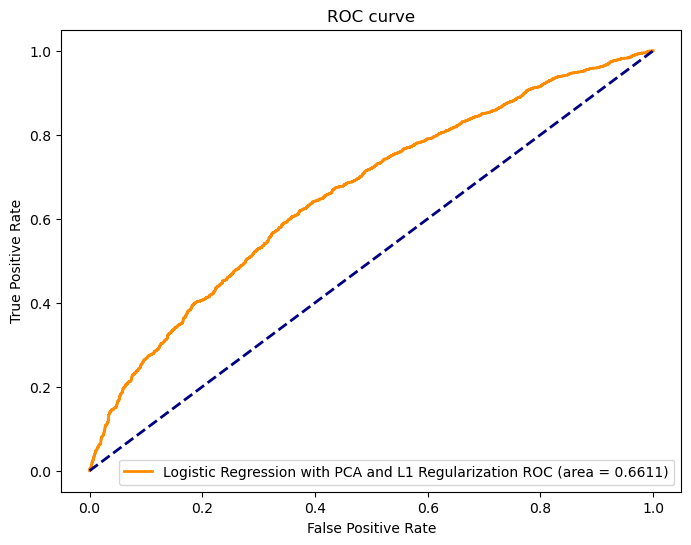

In [9]:
plot_roc_curve(y_pred_proba, y_test, "Logistic Regression with PCA and L1 Regularization")

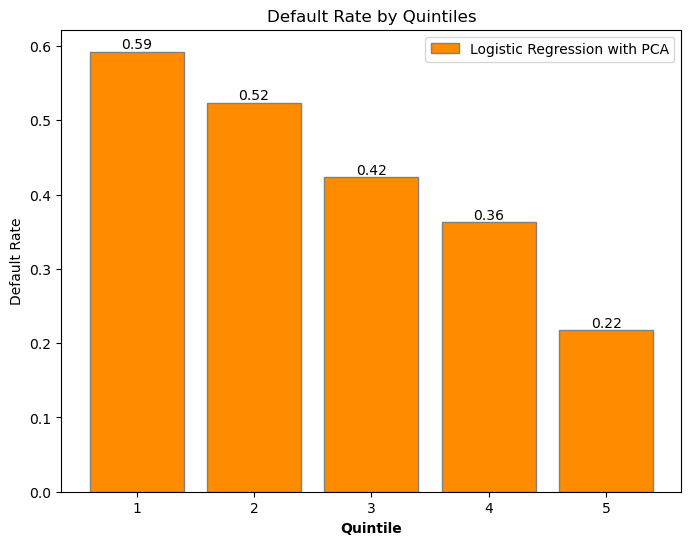

In [10]:
default_rate_by_quintile(y_pred_proba, y_test, "Logistic Regression with PCA")

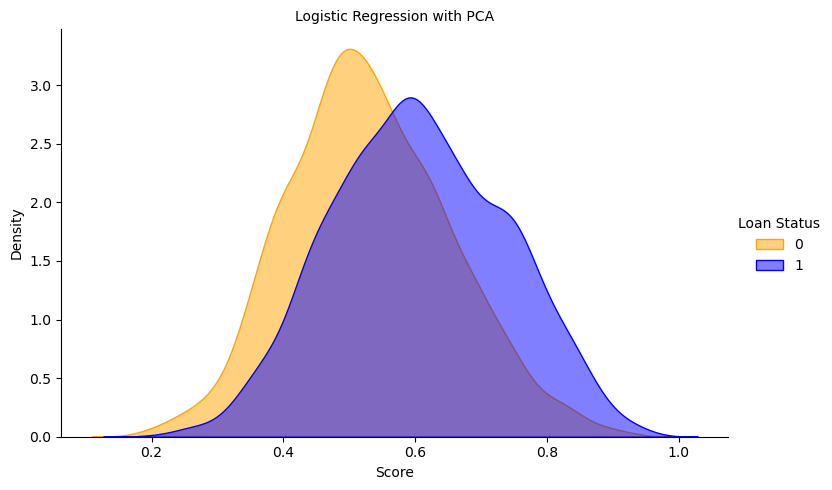

In [11]:
plot_density(y_pred_proba, y_test, "Logistic Regression with PCA")

### Pipeline SGD

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
pipeline_SGD = Pipeline([
    ('SGD_clf',  SGDClassifier(loss='log_loss', max_iter=1000, penalty='l2', shuffle=True, random_state=5))
])

In [14]:
pipeline_SGD.fit(X_train, y_train)

Pipeline(steps=[('SGD_clf', SGDClassifier(loss='log_loss', random_state=5))])

In [15]:
joblib.dump(pipeline_SGD, 'pipelines/model_SGD.joblib')

['pipelines/model_SGD.joblib']

In [16]:
pipeline_loaded = joblib.load('pipelines/model_SGD.joblib')

In [17]:
y_pred_proba = pipeline_loaded.predict_proba(X_test)[:, 1]
y_pred = pipeline_loaded.predict(X_test)

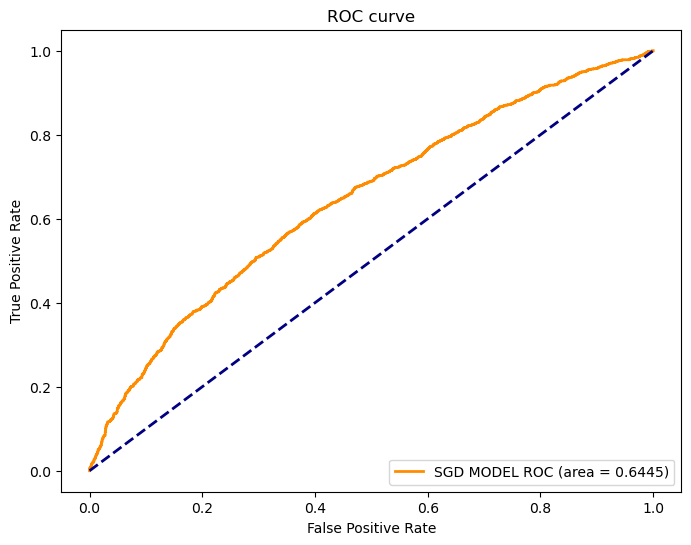

In [18]:
plot_roc_curve(y_pred_proba, y_test, "SGD MODEL")

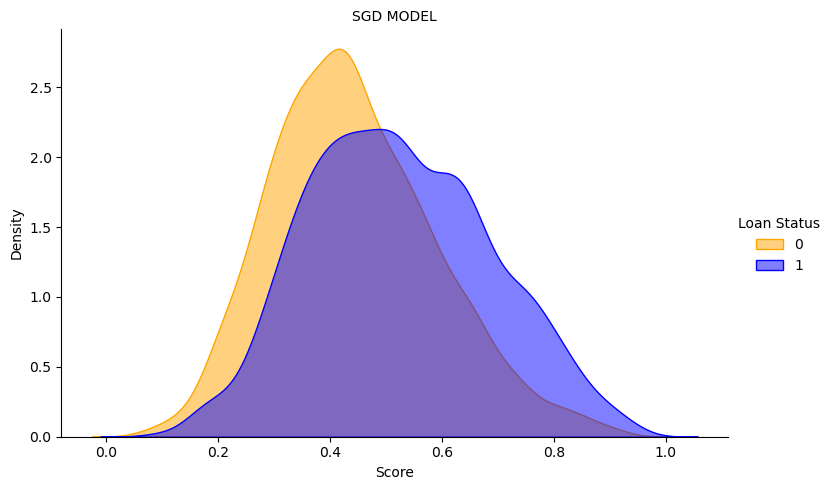

In [19]:
plot_density(y_pred_proba, y_test, "SGD MODEL")